In [ ]:
# Dữ liệu số ca nhiễm covid vào ngày 01 tháng 3 năm 2021 trên toàn thế giới
#kiểm tra châu nào có ca nhiễm nhiều nhất, số người chết nhiều nhất, tỷ lệ người trên 70 cao nhất
#kiểm tra châu nào có ca nhiễm ít nhất,...
# trong châu có ca nhiều nhất thì tìm nước có ca nhiễm nhiều nhất, chết nhiều nhất, và ít nhất
#tìm mô hình hồi quy giữa tỷ lệ chết với tỉ lệ ca nhiễm trên 70 tuổi

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('covid_data.csv')
data.info()
data.dropna(how="all", inplace=True)
data.isna().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  173 non-null    object 
 1   location                  173 non-null    object 
 2   continent                 173 non-null    object 
 3   total_cases               173 non-null    int64  
 4   total_cases_per_million   173 non-null    float64
 5   total_deaths              173 non-null    int64  
 6   total_deaths_per_million  173 non-null    float64
 7   population                173 non-null    int64  
 8   aged_70_older             173 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
iso_code,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
location,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
continent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_cases_per_million,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_deaths,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_deaths_per_million,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
population,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
aged_70_older,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

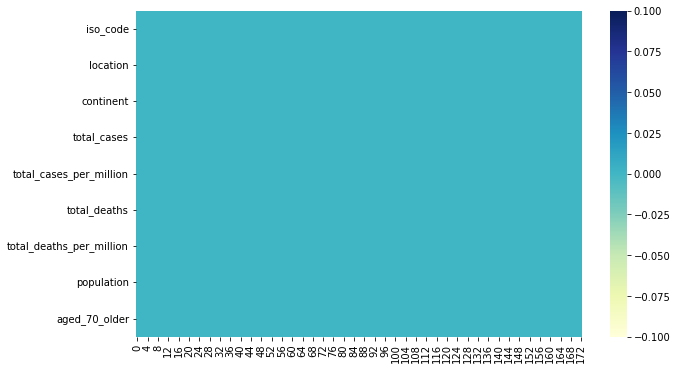

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(), cmap='YlGnBu')

In [12]:
data[['location', 'continent', 'total_cases', 'total_deaths', 'population']]

,location,continent,total_cases,total_deaths,population
0,Afghanistan,Asia,55733,2444,38928341
1,Albania,Europe,107931,1816,2877800
2,Algeria,Africa,113255,2987,43851043
3,Angola,Africa,20854,508,32866268
4,Antigua and Barbuda,North America,769,14,97928
...,...,...,...,...,...
168,Venezuela,South America,139545,1348,28435943
169,Vietnam,Asia,2448,35,97338583
170,Yemen,Asia,2310,634,29825968
171,Zambia,Africa,79002,1098,18383956


In [61]:
# Thống kê tổng số ca nhiễm cao nhất, thấp nhất theo quốc gia
totalCaseMax = data['total_cases'].max()
totalCaseMin = data['total_cases'].min()

recordMax = data[data['total_cases'] == totalCaseMax]
recordMax
recordMin = data[data['total_cases'] == totalCaseMin]
recordMin




,iso_code,location,continent,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,population,aged_70_older
55,FJI,Fiji,Oceania,59,65.816,2,2.231,896444,3.284


In [13]:
data[data['location'] == 'Vietnam']

,iso_code,location,continent,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,population,aged_70_older
169,VNM,Vietnam,Asia,2448,25.149,35,0.36,97338583,4.718
